0. Задача: Определение степени зависимости от социальных сетей.

In [ ]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

1. Чтение данных

In [ ]:
url = "https://raw.githubusercontent.com/AndreyBugrov/ML/refs/heads/main/Time_Wasters_on_Social_Media.csv"
raw_data = pd.read_csv(url)

In [ ]:
raw_data.shape

(1000, 31)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

Columns Description\
UserID: A unique identifier assigned to each user.\
Age: The age of the user.\
Gender: The gender of the user.\
Location: The geographical location of the user.\
Income: The annual income of the user.\
Debt: Tells If the is in Debt or Not.\
Owns Property: Indicates whether the user owns any property (Yes/No).\
Profession: The profession or job title of the user.\
Demographics: Additional demographic information about the user (Rural or Urban Life).\
Platform: The social media platform used by the user (e.g., Facebook, Instagram, TikTok).\
Total Time Spent: The total time the user has spent on the platform.\
Number of Sessions: The number of sessions the user has had on the platform.\
Video ID: A unique identifier for each video watched.\
Video Category: The category of the video watched (e.g., Entertainment, Gaming, Pranks, Vlog).\
Video Length: The length of the video watched.\
Engagement: The engagement level of the user with the video (e.g., Likes, Comments).\
Importance Score: A score representing the perceived importance of the video to the user.\
Time Spent On Video: The amount of time the user spent watching the video.\
Number of Videos Watched: The total number of videos watched by the user.\
Scroll Rate: The rate at which the user scrolls through content.\
Frequency: How frequently the user logs into the platform.\
Productivity Loss: The amount of productivity lost due to time spent on social media.\
Satisfaction: The satisfaction level of the user with the content consumed.\
Watch Reason: The reason why the user watched the video (e.g., Entertainment, Information).\
DeviceType: The type of device used to access the platform (e.g., Mobile, Desktop).\
OS: The operating system of the device used.\
Watch Time: The specific time of day when the user watched the video.\
Self Control: The user's self-assessed level of self-control while using the platform.\
Addiction Level: The user's self-assessed level of addiction to social media.\
Current Activity: The activity the user was engaged in before using the platform.\
ConnectionType: The type of internet connection used by the user (e.g., Wi-Fi, Mobile Data).\
Числовые признаки:
- UserID
- Age
- Income
- Total Time Spent
- Video Length
- Engagement
- Time Spent On Video
- Number of Videos Watched
- Scroll Rate\
Бинарные признаки:
- Debt
- Owns Property\
Категориальные признаки:
- Gender
- Location
- Profession
- Demographics
- Platform
- Video Category
- Frequency
- Productivity Loss
- Satisfaction
- Watch Reason
- OS
- Watch Time
- Self Control
- Addiction Level
- Current Activity
- ConnectionType

In [ ]:
numeric_columns = ["Age",	"Income", "Number of Sessions", "Video Length", "Time Spent On Video", "Number of Videos Watched", "Scroll Rate", "Engagement"]

In [ ]:
numeric_columns_set = set(numeric_columns)
for column in raw_data.columns:
  if column not in numeric_columns_set:
    print(f"{column}: {len(raw_data[column].unique())}")
print(raw_data["Location"].unique())

UserID: 1000
Gender: 3
Location: 10
Debt: 2
Owns Property: 2
Profession: 9
Demographics: 2
Platform: 4
Total Time Spent: 278
Video ID: 947
Video Category: 9
Importance Score: 9
Frequency: 4
ProductivityLoss: 9
Satisfaction: 9
Watch Reason: 4
DeviceType: 3
OS: 4
Watch Time: 16
Self Control: 8
Addiction Level: 8
CurrentActivity: 4
ConnectionType: 2
['Pakistan' 'Mexico' 'United States' 'Barzil' 'Vietnam' 'India'
 'Indonesia' 'Philippines' 'Japan' 'Germany']


Исключим следующие признаки:
- UserID - не имеет значение для обучения модели
- VideoID - не имеет значение для обучения модели
- Total Time Spent - не релевантен данной модели

In [ ]:
clean_data = raw_data.drop(["UserID", "Video ID", "Total Time Spent"], axis=1)

In [ ]:
clean_data["Profession"] = clean_data["Profession"].astype("category")
clean_data["Demographics"] = clean_data["Demographics"].astype("category")
clean_data["Platform"] = clean_data["Platform"].astype("category")
clean_data["Video Category"] = clean_data["Video Category"].astype("category")
clean_data["ProductivityLoss"] = clean_data["ProductivityLoss"].astype("category")
clean_data["Satisfaction"] = clean_data["Satisfaction"].astype("category")
clean_data["Watch Reason"] = clean_data["Watch Reason"].astype("category")
clean_data["OS"] = clean_data["OS"].astype("category")
clean_data["Watch Time"] = clean_data["Watch Time"].astype("category")
clean_data["Self Control"] = clean_data["Self Control"].astype("category")
clean_data["Addiction Level"] = clean_data["Addiction Level"].astype("category")
clean_data["CurrentActivity"] = clean_data["CurrentActivity"].astype("category")
clean_data["ConnectionType"] = clean_data["ConnectionType"].astype("category")

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1000 non-null   int64   
 1   Gender                    1000 non-null   object  
 2   Location                  1000 non-null   object  
 3   Income                    1000 non-null   int64   
 4   Debt                      1000 non-null   bool    
 5   Owns Property             1000 non-null   bool    
 6   Profession                1000 non-null   category
 7   Demographics              1000 non-null   category
 8   Platform                  1000 non-null   category
 9   Number of Sessions        1000 non-null   int64   
 10  Video Category            1000 non-null   category
 11  Video Length              1000 non-null   int64   
 12  Engagement                1000 non-null   int64   
 13  Importance Score          1000 non-null   int64  

2.1 Вычисление характеристик

In [ ]:
clean_data.describe()

,Age,Income,Number of Sessions,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,59524.213000,10.013000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000
std,13.497852,23736.212925,5.380314,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798
min,18.000000,20138.000000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000
25%,29.000000,38675.250000,6.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000
50%,42.000000,58805.000000,10.000000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000
75%,52.000000,79792.250000,15.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000
max,64.000000,99676.000000,19.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000



min: минимальное значение признака\
max: максимальное значение признака\
mean: среднее значение\
std: среднеквадратическое отклонение\
25%: первый квартиль (значение, ниже которого лежит 25% значений)\
50%: медиана (значение, 50% значений меньше которого, a другие 50% - больше)\
75%: третий квартиль (значение, ниже которого лежит около 75% значений)

2.2 Корреляционная матрица

3. Доказательство отсутствия пропущенных значений

In [ ]:
clean_data.isnull().sum().sum()

0

In [ ]:
clean_data['Addiction Level'].value_counts()

,count
Addiction Level,
2,248
5,228
0,180
3,159
1,60
7,55
4,36
6,34


In [ ]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(clean_data, alpha = .01, figsize = (10, 10))
# pass

4. Обработка категориальных признаков

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from copy import copy
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
numeric_colums_plus_target_column = copy(numeric_columns)
numeric_colums_plus_target_column.append("Addiction Level")
not_numeric_columns = list(set(clean_data.columns).difference(set(numeric_colums_plus_target_column)))
enc.fit(clean_data[not_numeric_columns])

dummies = pd.DataFrame(enc.transform(clean_data[not_numeric_columns]),
                       columns=enc.get_feature_names_out(), index=clean_data.index)
data = pd.concat((clean_data, dummies), axis=1).drop(not_numeric_columns, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 118 entries, Age to ConnectionType_Wi-Fi
dtypes: category(1), float64(109), int64(8)
memory usage: 915.5 KB


5. Нормализация

In [ ]:
data_numeric = data[numeric_columns]
data_numeric = (data_numeric - data_numeric.min(axis = 0))/(data_numeric.max(axis = 0) - data_numeric.min(axis = 0))

In [ ]:
data_numeric

,Age,Income,Number of Sessions,Video Length,Time Spent On Video,Number of Videos Watched,Scroll Rate,Engagement
0,0.826087,0.787976,0.888889,0.821429,0.892857,0.437500,0.877551,0.787800
1,0.608696,0.098833,0.722222,0.642857,0.857143,0.625000,0.459184,0.594863
2,0.304348,0.280344,0.277778,0.642857,0.285714,0.125000,0.887755,0.868767
3,0.913043,0.538422,1.000000,0.107143,0.178571,0.833333,0.938776,0.247015
4,0.152174,0.024617,0.277778,0.642857,0.428571,0.416667,0.030612,0.308819
...,...,...,...,...,...,...,...,...
995,0.086957,0.680379,0.333333,0.000000,0.571429,0.333333,0.469388,0.518110
996,0.478261,0.086349,0.777778,0.035714,0.035714,0.333333,0.142857,0.179392
997,0.195652,0.931379,0.000000,0.392857,0.285714,0.562500,0.438776,0.930571
998,0.934783,0.819809,0.555556,0.500000,0.392857,0.604167,0.622449,0.204174


In [ ]:
for numeric_column in numeric_columns:
  data[numeric_column] = copy(data_numeric[numeric_column])

In [ ]:
data.describe()

,Age,Income,Number of Sessions,Video Length,Engagement,Time Spent On Video,Number of Videos Watched,Scroll Rate,Satisfaction_1,Satisfaction_2,...,Profession_Artist,Profession_Cashier,Profession_Engineer,Profession_Labor/Worker,Profession_Manager,Profession_Students,Profession_Teacher,Profession_Waiting staff,Profession_driver,ConnectionType_Wi-Fi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.499696,0.495187,0.500722,0.507643,0.499865,0.499036,0.505167,0.497694,0.037000,0.145000,...,0.047000,0.056000,0.065000,0.186000,0.054000,0.246000,0.039000,0.194000,0.113000,0.314000
std,0.293432,0.298426,0.298906,0.293748,0.291969,0.292860,0.292274,0.297937,0.188856,0.352277,...,0.211745,0.230037,0.246649,0.389301,0.226131,0.430894,0.193692,0.395627,0.316751,0.464349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.239130,0.233062,0.277778,0.250000,0.240870,0.250000,0.270833,0.224490,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.521739,0.486145,0.500000,0.500000,0.501756,0.500000,0.500000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.739130,0.750009,0.777778,0.750000,0.755017,0.750000,0.750000,0.744898,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
corr_mat = data.corr(numeric_only=True)
# corr_mat = data[numeric_columns].corr(numeric_only=True)
corr_mat

,Age,Income,Number of Sessions,Video Length,Engagement,Time Spent On Video,Number of Videos Watched,Scroll Rate,Satisfaction_1,Satisfaction_2,...,Profession_Artist,Profession_Cashier,Profession_Engineer,Profession_Labor/Worker,Profession_Manager,Profession_Students,Profession_Teacher,Profession_Waiting staff,Profession_driver,ConnectionType_Wi-Fi
Age,1.000000,-0.017923,0.006563,0.009557,0.010417,0.034535,-0.033776,-0.018768,0.036723,-0.003362,...,0.033152,-0.054552,-0.001530,0.034976,-0.043370,0.021934,0.042708,-0.020673,-0.023511,0.017152
Income,-0.017923,1.000000,-0.009979,0.017432,-0.017183,-0.041666,-0.036211,0.029066,0.020126,0.019536,...,-0.067849,-0.039763,0.042452,0.019619,0.010845,-0.006816,0.034401,-0.000154,-0.002249,-0.020897
Number of Sessions,0.006563,-0.009979,1.000000,-0.002076,-0.007600,-0.014127,-0.012761,0.013610,0.046813,0.079281,...,0.014400,-0.020808,0.009169,0.008403,-0.049120,-0.018220,0.006237,0.044430,-0.011435,0.019199
Video Length,0.009557,0.017432,-0.002076,1.000000,0.001286,0.004256,0.037753,-0.044744,0.003919,-0.005883,...,0.037326,-0.024328,-0.015252,-0.014007,0.039527,-0.025602,-0.025979,0.033987,0.001851,0.009908
Engagement,0.010417,-0.017183,-0.007600,0.001286,1.000000,-0.040716,-0.000719,-0.001441,0.011388,-0.021492,...,-0.018431,0.028429,-0.043910,-0.006365,0.038582,-0.023580,0.001014,0.047850,-0.022162,0.016548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Profession_Students,0.021934,-0.006816,-0.018220,-0.025602,-0.023580,-0.044579,0.036263,0.032430,0.011046,-0.024202,...,-0.126848,-0.139120,-0.150603,-0.273040,-0.136469,1.000000,-0.115067,-0.280230,-0.203873,-0.016229
Profession_Teacher,0.042708,0.034401,0.006237,-0.025979,0.001014,-0.020134,-0.098236,-0.011538,-0.012123,0.019732,...,-0.044738,-0.049066,-0.053116,-0.096297,-0.048131,-0.115067,1.000000,-0.098833,-0.071903,0.019521
Profession_Waiting staff,-0.020673,-0.000154,0.044430,0.033987,0.047850,-0.031399,0.000341,0.000073,-0.002385,0.063707,...,-0.108952,-0.119493,-0.129355,-0.234519,-0.117215,-0.280230,-0.098833,1.000000,-0.175110,0.011355
Profession_driver,-0.023511,-0.002249,-0.011435,0.001851,-0.022162,0.016977,0.019367,-0.031113,0.013705,-0.039337,...,-0.079265,-0.086933,-0.094108,-0.170617,-0.085276,-0.203873,-0.071903,-0.175110,1.000000,0.030748


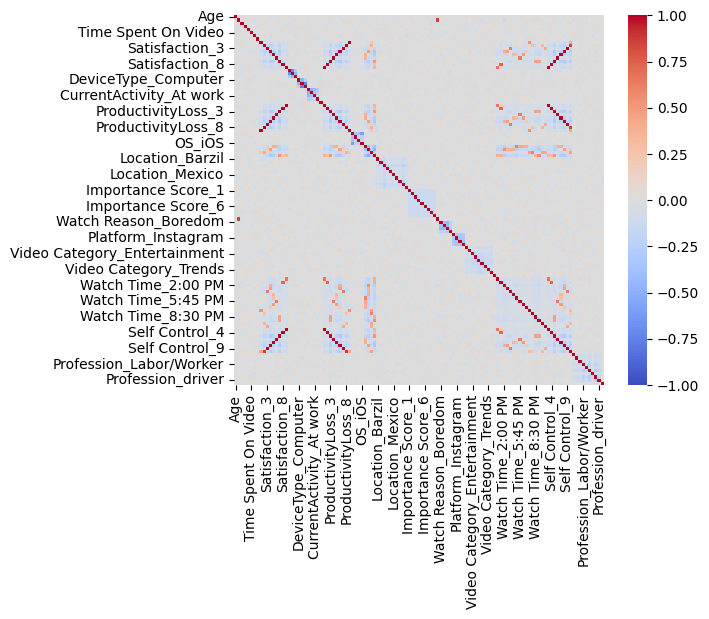

In [ ]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

6 Обучающая и тестовая выборки

Для классификации используем все признаки. Разобьем данные на обучающую и тестовую выборки. За обучающую примем 75%, оставшиеся  - за тестовую

In [ ]:
removed_data = copy(data)
removed_data = removed_data.drop(['Addiction Level'], axis=1)
y = data["Addiction Level"]
X = removed_data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(750, 250)

In [ ]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train = (X_train - mean) / std
X_test =  (X_test  - mean) / std

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

7. K ближайших соседей\
по умолчанию 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_def = KNeighborsClassifier()
knn_def.fit(X_train, y_train)
knn_train_pred = 100 * knn_def.score(X_train, y_train)
knn_test_pred = 100 * knn_def.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 99.87%, Test: 99.20%. 


Увеличим количество соседей

In [ ]:
knn_def = KNeighborsClassifier(n_neighbors=10)
knn_def.fit(X_train, y_train)
knn_train_pred = 100 * knn_def.score(X_train, y_train)
knn_test_pred = 100 * knn_def.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 99.87%, Test: 99.60%. 


In [ ]:
knn_def = KNeighborsClassifier(n_neighbors=20)
knn_def.fit(X_train, y_train)
knn_train_pred = 100 * knn_def.score(X_train, y_train)
knn_test_pred = 100 * knn_def.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 99.73%, Test: 99.60%. 


In [ ]:
knn_def = KNeighborsClassifier(n_neighbors=40)
knn_def.fit(X_train, y_train)
knn_train_pred = 100 * knn_def.score(X_train, y_train)
knn_test_pred = 100 * knn_def.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 99.87%, Test: 99.60%. 


Задача оказалась достаточно простой, поэтому ошибка на тесте слабо меньше ошибки на трейне.